In [1]:
from s3fs import S3FileSystem

s3 = S3FileSystem(anon=True)
#s3.ls('cesarschool-data-samples/tennis/')

In [2]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

df = dd.read_csv(('s3://cesarschool-data-samples/tennis/atp_matches_197*.csv', 's3://cesarschool-data-samples/tennis/atp_matches_198*.csv', 's3://cesarschool-data-samples/tennis/atp_matches_199*.csv', 's3://cesarschool-data-samples/tennis/atp_matches_20*.csv'), storage_options={'anon': True}) 

In [3]:
from datetime import datetime

df['year'] = df.apply(lambda x: datetime.strptime(str(x.loc['tourney_date']), '%Y%m%d').year, axis=1, meta=int)

In [90]:
#vencedores = df.groupby('winner_name')
#v_hard = df[df['surface'] == 'Hard']
surf = df.groupby(['surface', 'winner_name'])['tourney_id'].count()
#v_hard = v_hard['tourney_id'].count()
#v_hard = v_hard.sort_values(by='tourney_id', ascending=False)

In [4]:
jogador = df.groupby(['surface', 'winner_name'])['tourney_id'].count()
pais = df.groupby(['surface', 'winner_ioc'])['tourney_id'].count()

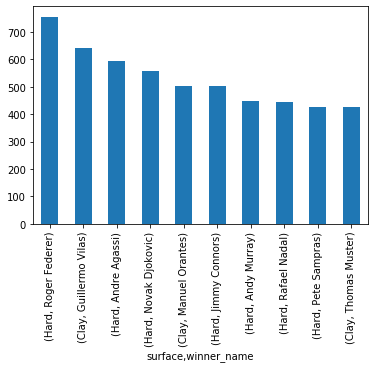

In [5]:
jogador.nlargest(20).compute()
jogador.nlargest(10).compute().plot.bar()

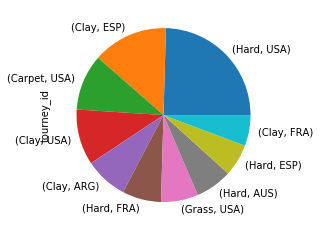

In [6]:
#pais.nlargest(20).compute()
pais.nlargest(10).compute().plot.pie()

In [57]:
df['decade'] = df.apply(lambda x: str(x.loc['tourney_date'])[2] + '0', axis=1, meta=int)
df['jd'] = df.apply(lambda x: str(x.loc['winner_name']) + ' - ' + str(x.loc['decade']), axis=1, meta=str)

In [58]:
#j_80 = df[df['decade'] == '80'].groupby(['decade', 'winner_name'], as_index=False)['tourney_id'].count()
j_decadas = df.groupby(['decade', 'winner_name', 'jd']).count().reset_index()
j_decadas = j_decadas[['decade', 'winner_name', 'surface', 'jd']]

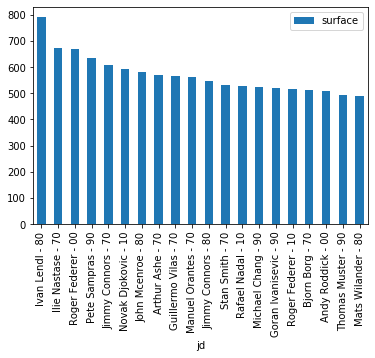

In [59]:
#j_80.nlargest(20).compute()
#j_80.nlargest(10).compute().plot.bar()
#j_decadas.head()
j_decadas.nlargest(20, 'surface').compute().plot.bar(x = 'jd')